## Importing Libraries

In [1]:
#importing libs
import warnings, datetime, csv,itertools, pandas as pd, matplotlib.pyplot as plt
import numpy as np
# for csv data 
from pandas import DataFrame
from pandas import concat
from pandas import Series 
# for normalization and scaling
from sklearn import preprocessing
# for measuring the accuracy of the model
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
# models for fitting and predicting
from sklearn import tree
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
# for correlation plotting
from pandas.tools.plotting import lag_plot
# for preventing warnings messages
warnings.filterwarnings('ignore')

## Loading CSV and defining plots parameters

In [2]:
#reading the dataset and converting date & time column into datetime obj
df = pd.read_csv('wqfull2.csv')
df['datetime'] =  pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M')
colors = ['r','b','y','g']
models_names = ['MLP','Linear Regression','Logistic Regression','Decision Tree Regressor']
features_names = ['Elevation','Elevation/tidal prediction','Salinity','Observed elev diff','Nitrate']
accuracy = [explained_variance_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score]

## Measurements over the past 8 years

In [14]:
#--- The quadrant plot since 21/10/2010 until 18/3/2018 ---
def measurements():
    X = np.arange(len(df))
    for i in range(6):
        if i == 5:
            break
        else:
            plt.subplot( 3, 2, i+1 )
            plt.plot(X,df.iloc[:,(4+2*i)],c='k')
            plt.margins(0,0)
            plt.title(features_names[i])
            plt.xlabel( 'days over 8 years' )
            plt.ylabel( 'Measurement' )
            plt.grid()
    plt.show()

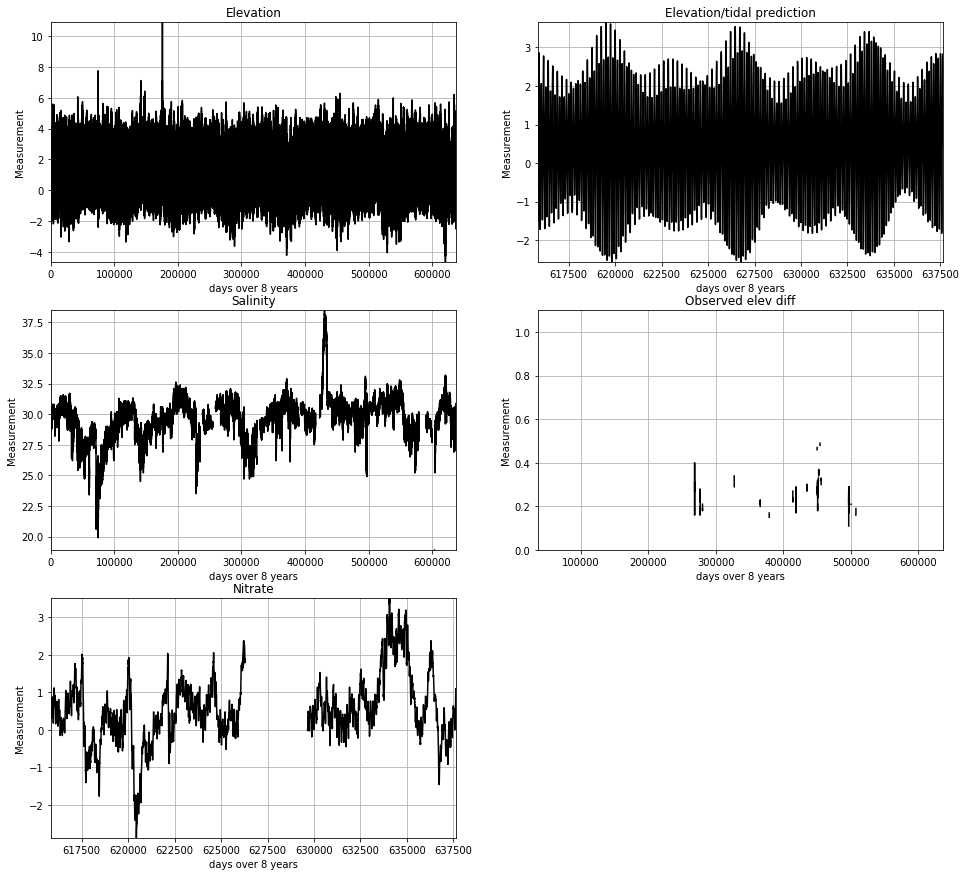

In [17]:
plt.figure(figsize=(16,15))
measurements()

## Correlation

In [9]:
#--- The correlation between each value and the following one ---
def correlation():
    for i in range(6):
        if i == 5:
            break
        else:
            plt.subplot( 3, 2, i+1 )
            n1 = lag_plot(df.iloc[:,(4+2*i)],c='k',alpha='0.4')
            plt.title(features_names[i])
            plt.grid()

    plt.show()

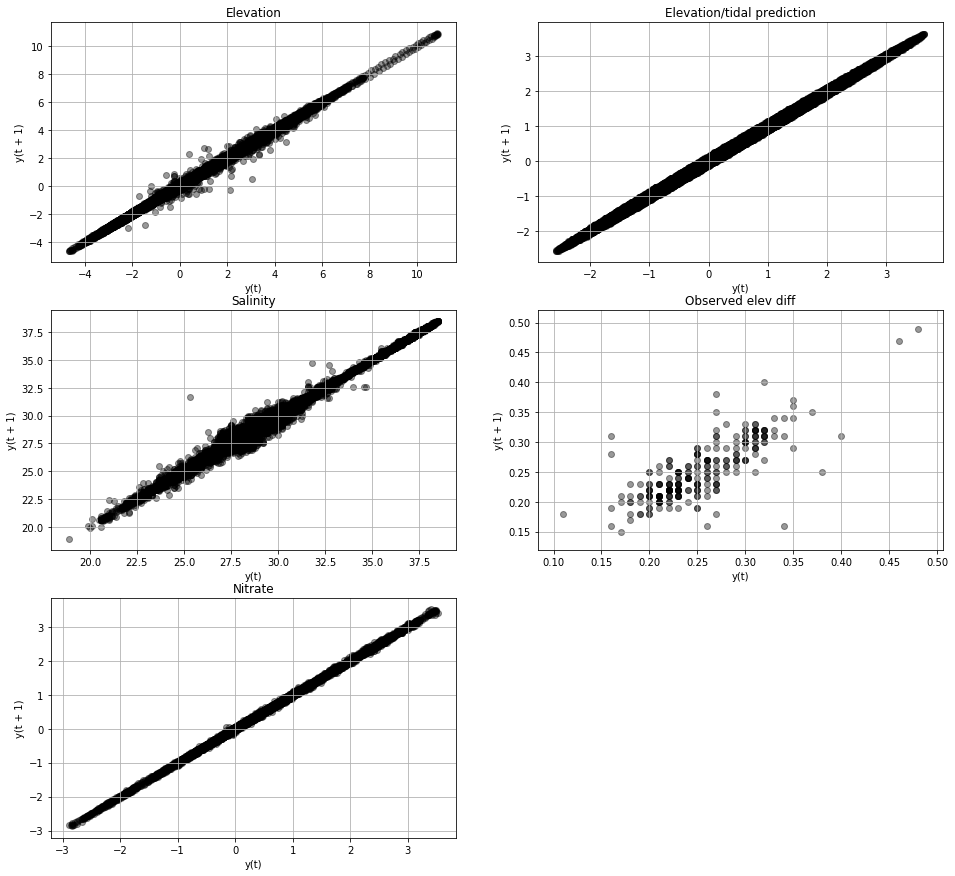

In [10]:
plt.figure(figsize=(16,15))
correlation()

In [11]:
#find the value of the correlation for the features
for i in range(5):
    values = DataFrame(df.iloc[:,4+2*i].values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    result = dataframe.corr()
    print(features_names[i],'\n',result,'\n')

Elevation 
           t-1       t+1
t-1  1.000000  0.998771
t+1  0.998771  1.000000 

Elevation/tidal prediction 
           t-1       t+1
t-1  1.000000  0.998723
t+1  0.998723  1.000000 

Salinity 
           t-1       t+1
t-1  1.000000  0.998775
t+1  0.998775  1.000000 

Observed elev diff 
           t-1       t+1
t-1  1.000000  0.790495
t+1  0.790495  1.000000 

Nitrate 
           t-1       t+1
t-1  1.000000  0.999587
t+1  0.999587  1.000000 

